In [1]:
# Yhdistetään aluksi Driveen
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/MyDrive/data

# Suoritetaan olennaisimmat importit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tyyliluokitus seaborn-kirjastolle
sns.set_style("white")

Mounted at /gdrive
/gdrive/MyDrive/data


# Ensimmäinen aineisto
Valitaan tehtävän ensimmäiseksi aineistoksi Titanicin matkustajaluettelo ja lähdetään tutkimaan sitä.



In [2]:
titanic_df = pd.read_excel("titanic.xlsx")

# Katsotaan mitä löytyy
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Sarakkeiden selitteet
Aineistoa tutkittaessa huomaa, että jotkin sarakenimet eivät ole täysin yksiselitteisiä. Selitetään nämä:
- pclass: matkustusluokka
- survived: jäikö matkustaja eloon (1 = True, 0 = False)
- sibsp: sisarusten/puolisoiden määrä Titanicilla
- parch: vanhempien/lasten määrä Titanicilla
- ticket: lippunumero
- fare: lipun hinta
- cabin: hyttinumero
- embarked: mistä satamasta matkustaja astui alukselle
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton
- boat: pelastusveneen numero
- body: ruumiin numero (mikäli matkustaja ei selvinnyt ja ruumis löytyi)
- home.dest: kotipaikka/kohde

## Aineiston tutkiminen
Kenties ensimmäinen kysymys, joka jokaiselle tulee mieleen, on eloonjäänneiden ja menehtyneiden määrä:

In [3]:
survivor_count = titanic_df["survived"].value_counts()[1]
deceased_count = titanic_df["survived"].value_counts()[0]

print(f"Eloonjääneet: {survivor_count}")
print(f"Menehtyneet: {deceased_count}")

Eloonjääneet: 500
Menehtyneet: 809


...tai matkustajien keski-ikä (niiden joukosta kenen ikä oli tiedossa):

In [4]:
average_age = titanic_df["age"].mean()

# Pyöristys yhden desimaalin tarkkuudella
print(f"Matkustajien keski-ikä: {average_age:.1f}")

Matkustajien keski-ikä: 29.9


### Tilastolliset tunnusluvut

In [5]:
titanic_df.describe(include="all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3,28,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


Selitteet:
- count: lukumäärä
- kategoriset sarakkeet:
  - unique: uniikkien arvojen määrä
  - top: sarakkeen yleisin arvo
  - freq: kuinka usein yleisin arvo esiintyy
- mean: keskiarvo
- std: keskihajonta
- min: pienin arvo
- 25%: alaneljännes
- 50%: mediaani
- 75%: yläneljännes
- max: suurin arvo

### Potentiaalisia kysymyksiä
Aineiston perusteella voi esittää lukuisia eri kysymyksiä, joista yritän vastata mahdollisimman moneen, vaikken niitä itse tässä suoraan esittäisikään. Esimerkkejä "hyvistä" kysymyksistä voisi olla esimerkiksi:
- Mikä oli matkustusluokkakohtainen sukupuolijakauma?
- Mikä oli matkustajien jakauma ikäryhmittäin?
- Oliko matkustajan lähtösatamalla tai matkustusluokalla yhteyttä tämän selviytymiseen taikka matkalipun hintaan?
- Löytyykö tiettyjen muuttjien välillä tilastollisesti merkitseviä eroja?
- Minkälaisia hajontakaavioita muodostuu määrällisistä muuttujista?
- Kuinka monen menehtyneen ruumis jäi löytämättä?

### Frekvenssejä
Tarkastellaan aluksi vaikkapa matkustusluokkien jakaumaa.

In [6]:
# Annetaan aineiston arvoille selkeämmät nimet
pclass_values = ["1st class", "2nd class", "3rd class"]

# Ristiintaulukointi
pclass_df = pd.crosstab(titanic_df["pclass"], columns = "freq")
pclass_df.columns.name = ""
pclass_df.index = pclass_values

# Lisätään taulukointiin prosenttisarake
n = pclass_df["freq"].sum()
pclass_df["%"] = pclass_df["freq"] / n * 100

# Lisätään vielä yhteensä-rivi
pclass_df.loc["Total"] = pclass_df.sum()

# Taulukon muotoilu
pclass_df.style.format({"freq": "{:.0f}", "%": "{:.2f} %" })

,freq,%
1st class,323,24.68 %
2nd class,277,21.16 %
3rd class,709,54.16 %
Total,1309,100.00 %


Taulukosta huomaa selkeästi, että suurin osa matkustajista olivat kolmosluokassa.

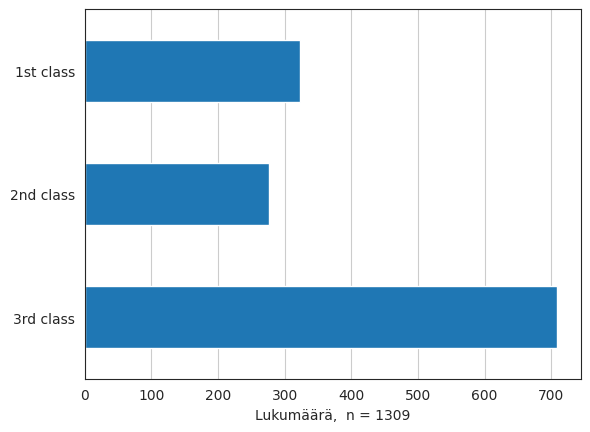

In [7]:
# Luodaan vaakapylväskaavio, järjestetään matkustusluokat uudelleen
# ja pilkotaan liian leveä koodirivi pienempiin osiin, jottei
# sivuttaisi PEP8-ohjenuoria
pclass_df.drop("Total")["freq"] \
  .sort_index(ascending = False) \
  .plot(kind = "barh", rot = 0)

# Lisätään selite x-akselille
plt.xlabel(f"Lukumäärä,  n = {n}")
plt.grid(axis = "x")

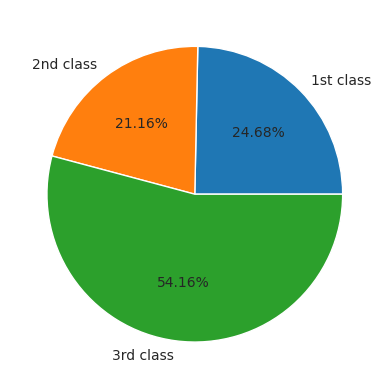

In [8]:
# Katsotaan prosenttijakauma sen sijaan piiraskaaviona
pclass_df.drop("Total")["%"].plot(
    kind = "pie", autopct = "%1.2f%%", ylabel = "")

# Tämän tarkoitus vain muotoilla tulosteesta pois epäolennaisuudet
plt.show()

Tämän lisäksi voisi olla mielenkiintoista vilkaista sukupuolijakaumaa matkustusluokan mukaan.

In [9]:
# Ristiintaulukointi
gender_pclass_df = pd.crosstab(titanic_df["sex"], titanic_df["pclass"])

# Muotoilut
gender_pclass_df.columns.name = ""
gender_pclass_df.index.name = ""
classes = {1: "1st class", 2: "2nd class", 3: "3rd class"}
gender_pclass_df = gender_pclass_df.rename(columns=classes)

gender_pclass_df

,1st class,2nd class,3rd class
,,,
female,144,106,216
male,179,171,493


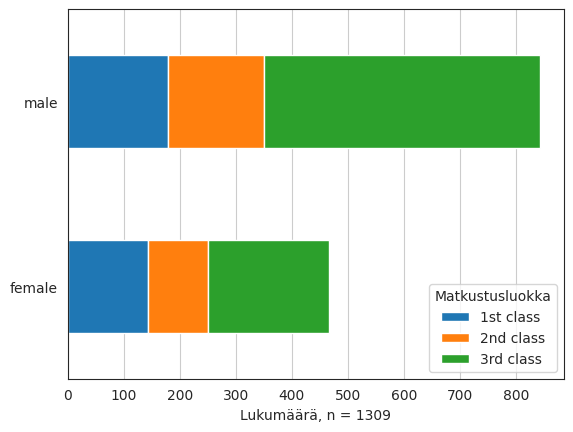

In [10]:
# Ilmaistaan tämä vielä vaakapylväskaaviona
gender_pclass_df.plot(kind = "barh", stacked = True)

# Muotoilut
plt.xlabel(f"Lukumäärä, n = {n}")
plt.legend(title="Matkustusluokka")
plt.grid(axis = "x")

### Määrälliset muuttujat
Sovelletaan luokiteltua jakaumaa seuraavaksi, kun tarkastelemme määrällisiä muuttujia. Muistin virkistämiseksi katsotaan uudestaan, mitä aineistosta löytyy:

In [11]:
# Alkuperäisen aineiston alku
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
# Tunnusluvut
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Luodaan alkuperäisestä aineistosta kopio ja lisätään siihen kaksi uutta saraketta, joista toinen käsittelee matkustajan ikäluokkaa ja toinen matkalipun hintaluokkaa:

In [82]:
# Luokkarajat
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
fare_bins = []
i = 0

# Lippujen luokkarajat kympin välein 0 - 240
while i < 250:
  fare_bins.append(i)
  i = i + 10

# Kopio ja uudet sarakkeet
titanic_df_copy = titanic_df.copy()
titanic_df_copy["age_group"] = pd.cut(titanic_df_copy["age"],
                                      bins = age_bins, right = False)
titanic_df_copy["fare_group"] = pd.cut(titanic_df_copy["fare"],
                                      bins = fare_bins, right = False)

titanic_df_copy

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group,fare_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","[20.0, 30.0)","[210, 220)"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 10.0)","[150, 160)"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 10.0)","[150, 160)"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","[30.0, 40.0)","[150, 160)"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[20.0, 30.0)","[150, 160)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,"[10.0, 20.0)","[10, 20)"
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,"[10, 20)"
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,"[20.0, 30.0)","[0, 10)"
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,"[20.0, 30.0)","[0, 10)"


Tarkastellaan seuraavaksi luokkien frekvenssijakaumia ja luodaan lopuksi myös histogrammi.

In [63]:
# Ristiintaulukointi ja muotoilu, ikäluokka
age_df = pd.crosstab(titanic_df_copy["age_group"], "freq")
age_df.columns.name = ""
age_df.index.name = "Group"
n = age_df["freq"].sum()
age_df["%"] = age_df["freq"] / n * 100
age_df.loc["Total"] = age_df.sum()
age_df.style.format({"freq": "{:.0f}", "%": "{:.2f} %" })

,freq,%
Group,,
"[0, 10)",82,7.84 %
"[10, 20)",143,13.67 %
"[20, 30)",344,32.89 %
"[30, 40)",232,22.18 %
"[40, 50)",135,12.91 %
"[50, 60)",70,6.69 %
"[60, 70)",32,3.06 %
"[70, 80)",7,0.67 %
"[80, 90)",1,0.10 %


In [83]:
# Ristiintaulukointi ja muotoilu, lipun hintaluokka
fare_df = pd.crosstab(titanic_df_copy["fare_group"], "freq")
fare_df.columns.name = ""
fare_df.index.name = "Group"
n = fare_df["freq"].sum()
fare_df["%"] = fare_df["freq"] / n * 100
fare_df.loc["Total"] = fare_df.sum()
fare_df.style.format({"freq": "{:.0f}", "%": "{:.2f} %" })

,freq,%
Group,,
"[0, 10)",491,38.12 %
"[10, 20)",261,20.26 %
"[20, 30)",206,15.99 %
"[30, 40)",86,6.68 %
"[40, 50)",22,1.71 %
"[50, 60)",56,4.35 %
"[60, 70)",30,2.33 %
"[70, 80)",39,3.03 %
"[80, 90)",22,1.71 %


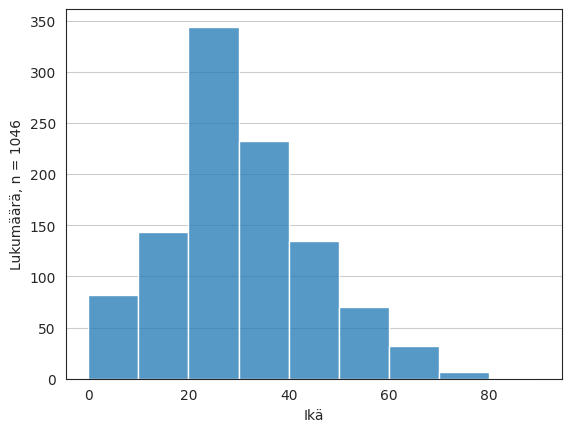

In [61]:
# Histogrammi, ikä
sns.histplot(titanic_df_copy["age"], bins = age_bins)
n = titanic_df_copy["age"].count()
plt.xlabel("Ikä")
plt.ylabel(f"Lukumäärä, n = {n}")
plt.grid(axis = "y")

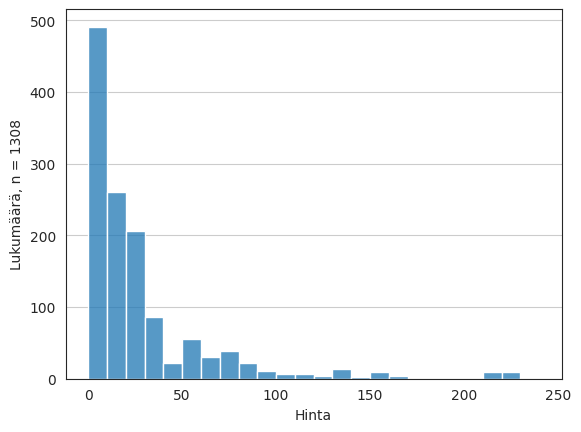

In [84]:
# Histogrammi, matkalipun hinta
sns.histplot(titanic_df_copy["fare"], bins = fare_bins)
n = titanic_df_copy["fare"].count()
plt.xlabel("Hinta")
plt.ylabel(f"Lukumäärä, n = {n}")
plt.grid(axis = "y")

Lippujen hintaluokkkien histogrammi näyttää olevan oikealle vino, josta huomaa, että käsittelyt arvot ovat yleisempiä raja-arvojen alkupuolella. Sitä emme varsinaisesti voi tietää, onko tämä ollut matkustajien oman päätöksen varassa, vai onko tarjolla edes ollut niin montaa hiemaan kalliimpaa lippua.

### Tunnuslukujen vertailua

In [18]:
# Katsotaan mikä vaikutus sukupuolella oli matkalipun hintaan
titanic_df.groupby("sex")["fare"].describe().style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,466.00,46.20,63.29,6.75,10.50,23.00,55.33,512.33
male,842.00,26.15,42.49,0.00,7.88,11.89,26.55,512.33


In [19]:
# Entäpä sukupuolen vaikutus sisarusten/puolisoiden määrään Titanicilla
titanic_df.groupby("sex")["sibsp"].describe().style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,466.00,0.65,1.10,0.00,0.00,0.00,1.00,8.00
male,843.00,0.41,1.00,0.00,0.00,0.00,1.00,8.00


In [20]:
# Matkustusluokan ja iän väliset tunnusluvut
titanic_df.groupby("pclass")["age"].describe().style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,284.00,39.16,14.55,0.92,28.00,39.00,50.00,80.00
2,261.00,29.51,13.64,0.67,22.00,29.00,36.00,70.00
3,501.00,24.82,11.96,0.17,18.00,24.00,32.00,74.00


In [21]:
# Selviytymisen ja iän väliset tunnusluvut
survival_df = titanic_df.groupby("survived")["age"].describe()

# Muotoillaan tuloste selkeämmäksi
survival_df.index = ["Dead", "Alive"]
survival_df.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
Dead,619.00,30.55,13.92,0.33,21.00,28.00,39.00,74.00
Alive,427.00,28.92,15.06,0.17,20.00,28.00,38.00,80.00


In [22]:
# Lähtösataman ja matkalipun väliset tunnusluvut
port_fare_df = titanic_df.groupby("embarked")["fare"].describe()

# Muotoilu
port_fare_df.index = ["Cherbourg", "Queenstown", "Southampton"]
port_fare_df.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
Cherbourg,270.00,62.34,84.19,4.01,13.86,28.52,78.97,512.33
Queenstown,123.00,12.41,13.62,6.75,7.75,7.75,10.20,90.00
Southampton,913.00,27.42,37.10,0.00,8.05,13.00,27.75,263.00


Nopealla silmäyksellä huomaa, että joidenkin asioiden välillä on varsin merkittäviä yhteyksiä. Vertailluista asioista selkein pienin yhteys oli iällä ja selviytymisellä. Havainnollistetaan näistä kolmea:

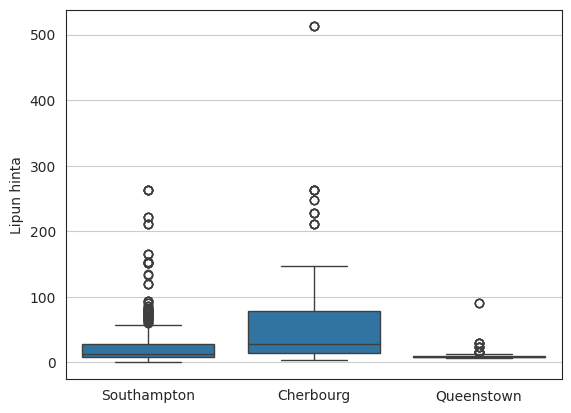

In [23]:
# Lähtösataman ja matkalipun vertailu
sns.boxplot(data = titanic_df, x = "embarked", y = "fare")
plt.xticks(ticks = [0, 1, 2],
           labels = ["Southampton", "Cherbourg", "Queenstown"])
plt.xlabel("")
plt.ylabel("Lipun hinta")
plt.grid(axis = "y")

Tuo yksinäinen kaukana oleva arvo saa kaavion näyttämään varsin kurjalta katseltavalta. Katsotaan tulisiko tästä hieman siistimpi, jos kaavio ylärajaksi annetaan 250:

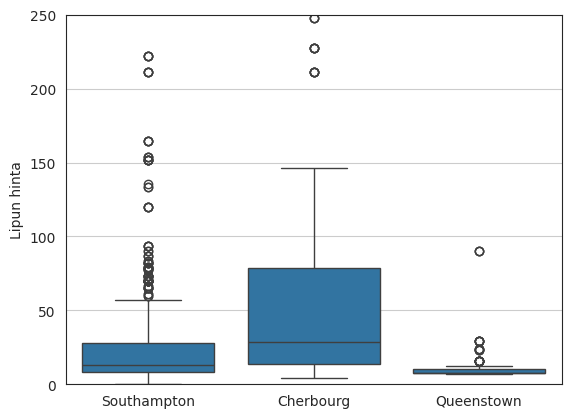

In [24]:
sns.boxplot(data = titanic_df, x = "embarked", y = "fare")
plt.xticks(ticks = [0, 1, 2],
           labels = ["Southampton", "Cherbourg", "Queenstown"])
plt.xlabel("")
plt.ylabel("Lipun hinta")

# Ylärajan määritys
plt.ylim(0, 250)
plt.grid(axis = "y")

Kaavioista huomaa, että poikkeavia arvoja esiintyy jokaisessa kohteessa. Silmäänpistävin on tuo yksittäinen piste Cherbourgin kohdalla, mutta huomio kiinnittyy myös Southamptoniin, josta löytyy liuta poikkeavia arvoja. Katsotaan huvin vuoksi, kuka tai ketkä nämä oletettavasti erittäin rikkaat Ranskasta kyytiin hypänneet matkustajat olivat:

In [25]:
titanic_df.loc[titanic_df["fare"] > 500]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


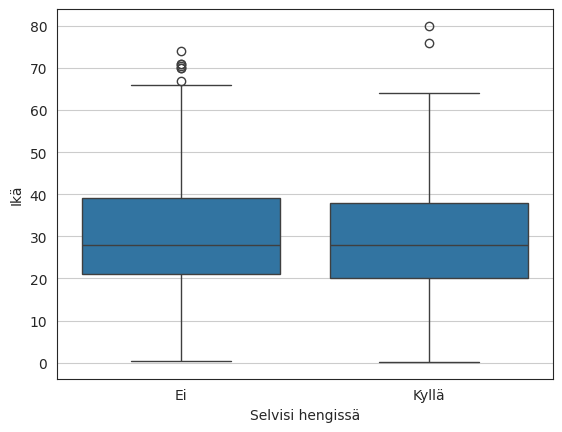

In [26]:
# Iän ja selviytymisen vertailu
sns.boxplot(data = titanic_df, x = "survived", y = "age")
plt.xticks(ticks = [0, 1],
           labels = ["Ei", "Kyllä"])
plt.xlabel("Selvisi hengissä")
plt.ylabel("Ikä")
plt.grid(axis = "y")

Kuten huomaa, tässä yhteydessä ei ole läheskään niin paljon poikkeavia arvoja kuin edellisessä tapauksessa. Kuvataa vielä iän ja matkustusluokan välinen yhteys:

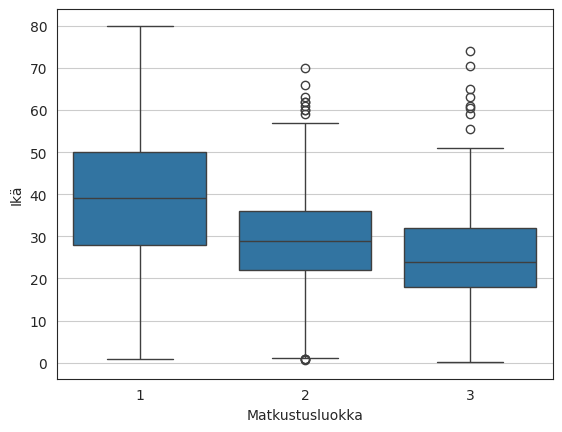

In [27]:
sns.boxplot(data = titanic_df, x = "pclass", y = "age")

plt.xlabel("Matkustusluokka")
plt.ylabel("Ikä")
plt.grid(axis = "y")

Hieman enemmän poikkeamia kuin edellisessä, muttei mitään radikaalisti silmäänpistävää.

### Tilastollinen merkitsevyys
Silmäillään seuraavaksi, onko joidenkin keskiarvojen välillä tilastollisesti merkitseviä eroja.

In [28]:
# Ikäkeskiarvon vertailua selviämisen ja sukupuolen mukaan
pivot_df = titanic_df.pivot_table(values = "age",
                                  index = "survived",
                                  columns = "sex",
                                  margins = True)
pivot_df.index = ["Dead", "Alive", "All"]
pivot_df.columns = ["Female", "Male", "All"]
pivot_df.style.format("{:.2f}")

,Female,Male,All
Dead,25.26,31.52,30.55
Alive,29.82,26.98,28.92
All,28.69,30.59,29.88


In [29]:
# Muodostetaan ryhmät vertailua varten
men = titanic_df["age"][titanic_df["sex"] == "male"][
    titanic_df["survived"] == 1]
women = titanic_df["age"][titanic_df["sex"] == "female"][
    titanic_df["survived"] == 1]
deceased_men = titanic_df["age"][titanic_df["sex"] == "male"][
    titanic_df["survived"] == 0]
deceased_women = titanic_df["age"][titanic_df["sex"] == "female"][
    titanic_df["survived"] == 0]

# Suoritetaan kahden riippumattoman otoksen t-testi
from scipy.stats import ttest_ind
p_survived = ttest_ind(men, women, equal_var = False, nan_policy = "omit")
p_deceased = ttest_ind(deceased_men, deceased_women, equal_var = False,
                   nan_policy = "omit")

# Tulostetaan testien p-arvot
print(f"Eloonjääneiden t-testin tulos: {p_survived[1]}")
print(f"Menedhtyneiden t-testin tulos: {p_deceased[1]}")

Eloonjääneiden t-testin tulos: 0.0761660635992671
Menedhtyneiden t-testin tulos: 5.460949850639564e-05


Eloonjääneiden keskuudessa ei ole tilastollisesti merkitseviä eroja (p-arvo > 0,05) ikäkeskiarvoissa, kun taas menehtyneiden keskuudessa ero (p-arvo = 0,00005460949850639564) on merkitsevä.

### Korrelaatiot
Katsotaan lopuksi vielä, löytäisimmekö määrällisten muuttujien väliltä riippuvuuksia korrelaatiokertoimien ja hajontakaavioiden avulla.

In [30]:
# Katsotaan vielä aineiston alkua ja luodaan kopio
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [31]:
# Luodaan kopio
corr_df = titanic_df.copy()

# Suodatetaan turhat sarakkeet pois ja pudotetaan NaN-arvoja sisältävät rivit
corr_df = corr_df.drop(["pclass", "survived", "name", "sex", "ticket",
                        "cabin", "embarked", "boat", "body", "home.dest"],
                       axis = 1).dropna()
corr_df

,age,sibsp,parch,fare
0,29.0000,0,0,211.3375
1,0.9167,1,2,151.5500
2,2.0000,1,2,151.5500
3,30.0000,1,2,151.5500
4,25.0000,1,2,151.5500
...,...,...,...,...
1301,45.5000,0,0,7.2250
1304,14.5000,1,0,14.4542
1306,26.5000,0,0,7.2250
1307,27.0000,0,0,7.2250


In [32]:
# Korrelaatiokertoimet osatekijöiden ja iän välillä
corr_df.corr()["age"]

age      1.000000
sibsp   -0.243139
parch   -0.150241
fare     0.178739
Name: age, dtype: float64

Kyseisistä luvuista voimakkain korrelaatio on iän ja sisarusten/puolisoiden määrän välillä. Toisiksi voimakkain korrelaatio on taas iän ja vanhempien/lasten määrän välillä, kun taas heikoin korrelaatio löytyy iän ja matkalipun hinnan väliltä.

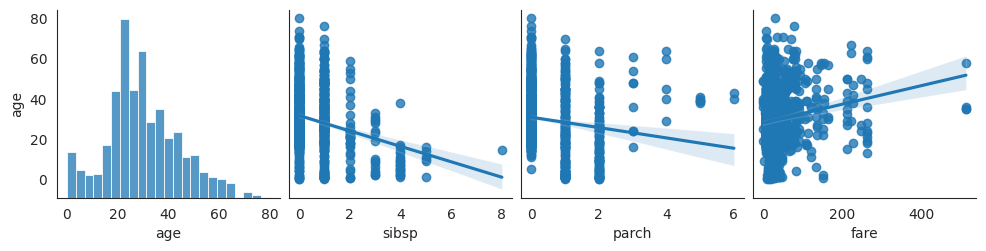

In [33]:
# Luodaan kaaviot näiden havainnollistamiseksi
sns.pairplot(corr_df, y_vars = "age", kind = "reg")

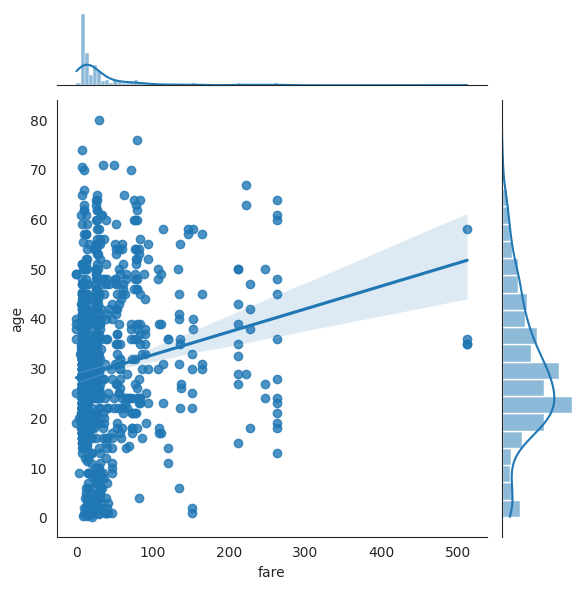

In [34]:
# Iän ja matkalipun hinnan tarkastelu hajontakaaviona
sns.jointplot(data = corr_df, x = "fare", y = "age", kind = "reg")

Tarkastellaan seuraavaksi matkalipun hinnan välistä yhteyttä muihin määrällisiin muuttujiin.

In [35]:
# Korrelaatiokertoimet osatekijöiden ja matkanlipun hinnan välillä
corr_df.corr()["fare"]

age      0.178739
sibsp    0.141184
parch    0.216723
fare     1.000000
Name: fare, dtype: float64

Lukemat ovat varsin samankaltaisia (samanlaisen matkan päässä nollasta), mutta tässä tapauksessa kaikki korrelaatiot ovat positiivisia. Kuvataan vielä nämä samalla tapaa kuin edelliset.

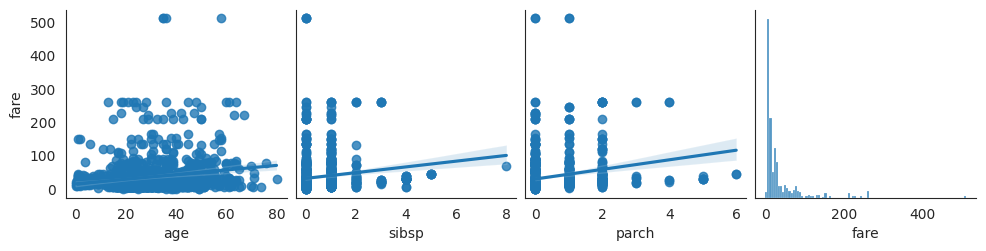

In [36]:
sns.pairplot(corr_df, y_vars = "fare", kind = "reg")

Korrelaatiokertoimien tilastollisen merkitsevyyden määrittämiseksi joudumme laskemaan näille p-arvot.

In [37]:
# Tuodaan tähän tarvittava funktio scipyn stats-moduulista
from scipy.stats import pearsonr

for i in corr_df:
  r, p = pearsonr(corr_df["age"], corr_df[i])
  print(f"{i:<10} r = {r:>6.3f}, p = {p}")

age        r =  1.000, p = 0.0
sibsp      r = -0.243, p = 1.5826171018096355e-15
parch      r = -0.150, p = 1.0680285042866324e-06
fare       r =  0.179, p = 5.955355439006709e-09


Tehdään sama käyttäen matkalipun hintaa:

In [38]:
for i in corr_df:
  r, p = pearsonr(corr_df["fare"], corr_df[i])
  print(f"{i:<10} r = {r:>6.3f}, p = {p}")

age        r =  0.179, p = 5.955355439006709e-09
sibsp      r =  0.141, p = 4.617061983259748e-06
parch      r =  0.217, p = 1.4225110671244766e-12
fare       r =  1.000, p = 0.0


Kuten tulosteista huomaa, kaikki p-arvot ovat pitkälle alle 0,05. Täten voidaan todeta korrelaatiokertoimien olevan tilastollisesti merkittäviä.

### Lopetus
Katsotaan vielä lopuksi tuo yksi vastaamatta jäänyt, alussa esittämäni kysymys: kuinka monen menehtyneen ruumis jäi löytämättä?

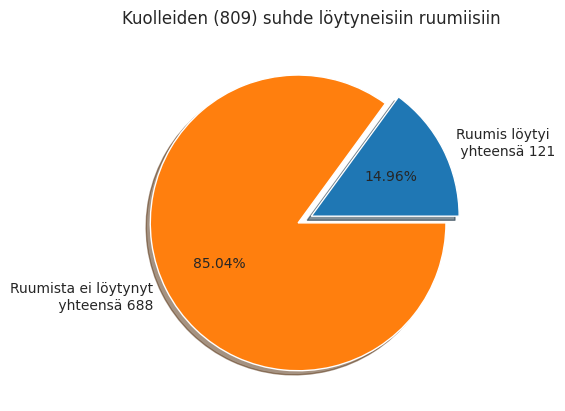

In [39]:
# Tehdään tarvittavat suodatukset
deceased_passengers = titanic_df[titanic_df["survived"] == 0]
missing_bodies_count = deceased_passengers["body"].isna().sum()

# Notebookin alussa on määritelty muuttuja deceased_count
found_bodies_count = deceased_count - missing_bodies_count
proportions = [found_bodies_count, missing_bodies_count]
labels = [f"Ruumis löytyi\n yhteensä {found_bodies_count}",
          f"Ruumista ei löytynyt\n yhteensä {missing_bodies_count}"]

# Esitys piiraskaaviona
plt.pie(proportions, explode = (0, 0.1), labels = labels,
        autopct = "%1.2f%%", shadow = True)
plt.title(f"Kuolleiden ({deceased_count}) suhde löytyneisiin ruumiisiin")
plt.show()

Vastaus: liian monen.

# Toinen aineisto
Valitaan tehtävän toiseksi aineistoksi "kunnat.xlsx".

In [40]:
# Luetaan data
towns_df = pd.read_excel("kunnat.xlsx")
towns_df

,Unnamed: 0,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
0,Akaa,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,...,4432,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7
1,Alajärvi,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,...,3302,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8
2,Alavieska,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,...,704,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8
3,Alavus,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,...,4056,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0
4,Asikkala,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,...,2282,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Ylivieska,85.9,15357,0.3,20.8,58.2,21.0,0.3,1.1,34,...,6587,2.4,21.1,75.5,106.5,734.0,7927.1,8720.0,2584.2,3672.5
305,Ylöjärvi,88.7,33533,0.5,20.5,60.5,19.0,0.3,1.4,130,...,9714,2.3,28.8,67.1,66.8,526.0,2463.4,3498.5,2266.7,2951.1
306,Ypäjä,41.1,2282,-1.4,11.6,58.5,29.9,0.7,1.1,-14,...,595,19.8,15.6,60.5,61.8,855.2,1506.1,2228.2,1569.6,3297.8
307,Ähtäri,61.9,5484,-0.7,13.4,52.4,34.2,0.1,1.2,-52,...,2029,10.7,25.2,62.5,101.1,586.6,3621.9,9556.5,1544.0,4759.7


In [41]:
# Nimetään ensimmäinen sarake asianmukaisemmaksi
towns_df = towns_df.rename(columns = {"Unnamed: 0": "Kunta"})

# Aineiston kaikki sarakkeet eivät mahdu tulosteeseen, luodaan niistä lista
columns = []
for i in towns_df:
  columns.append(i)

columns

['Kunta',
 'Taajama-aste, %, 2020',
 'Väkiluku, 2021',
 'Väkiluvun muutos edellisestä vuodesta, %, 2021',
 'Alle 15-vuotiaiden osuus väestöstä, %, 2021',
 '15-64 -vuotiaiden osuus väestöstä, %, 2021',
 'Yli 64-vuotiaiden osuus väestöstä, %, 2021',
 'Ruotsinkielisten osuus väestöstä, %, 2021',
 'Ulkomaan kansalaisten osuus väestöstä, %, 2021',
 'Syntyneiden enemmyys, henkilöä, 2021',
 'Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021',
 'Perheiden lukumäärä, 2020',
 'Asuntokuntien lukumäärä, 2021',
 'Rivi- ja pientaloissa asuvien asuntokuntien osuus, %, 2021',
 'Vuokra-asunnoissa asuvien asuntokuntien osuus, %, 2020',
 'Vähintään toisen asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020',
 'Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020',
 'Alueella asuvan työllisen työvoiman määrä, 2020',
 'Työllisyysaste, %, 2020',
 'Asuinkunnassaan työssäkäyvien osuus, %, 2020',
 'Työttömien osuus työvoimasta, %, 2020',
 'Eläkeläisten osuus väestös

## Aineiston tutkiminen ja mahdolliset kysymykset
Aineistoon perustuen mielenkiintoisia kysymyksiä voisivat olla esimerkiksi:
- Mitkä ovat 5 suurimman ja pienimmän väkiluvun kuntaa?
- Millä kunnilla on suurin ulkomaan kansalaisten osuus?
  - Entä onko tällä yhteyttä kyseisen kunnan työllisyysasteeseen?
- Minkälainen korrelaatio on korkeakoulun suorittaneiden ja kunnan perheiden lukumäärän välillä?
- Minkälainen korrelaatio on ruotsinkielisten ja eläkeläisten osuudella?

In [42]:
# Tilastolliset tunnusluvut
towns_df.describe()

,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021","Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,61.875405,17955.472492,-0.465372,14.753074,55.580259,29.664401,9.430421,3.106796,-26.100324,0.000000,...,7393.737864,10.440453,23.763754,63.682201,85.753074,677.923301,3341.946278,5602.757282,2005.773463,4065.811327
std,22.066455,50084.667410,1.182886,3.889350,4.357919,7.060984,24.392197,3.158197,172.848104,305.371522,...,27126.461941,7.539232,9.990754,10.330891,19.797897,380.002042,1818.144829,2923.164014,338.187718,878.299303
min,0.000000,105.000000,-4.800000,4.000000,46.500000,10.800000,0.000000,0.200000,-587.000000,-4210.000000,...,22.000000,0.100000,2.300000,22.300000,34.600000,-583.300000,0.000000,0.000000,366.300000,1221.900000
25%,47.300000,2673.000000,-1.200000,12.100000,52.300000,25.000000,0.100000,1.400000,-65.000000,-30.000000,...,807.000000,3.800000,17.200000,57.300000,71.500000,502.100000,2037.900000,3587.400000,1783.300000,3463.200000
50%,60.800000,5967.000000,-0.600000,14.400000,55.500000,29.300000,0.300000,2.100000,-31.000000,-5.000000,...,1849.000000,9.500000,22.900000,63.900000,86.800000,664.900000,3287.500000,5400.200000,1964.200000,4010.600000
75%,77.400000,14643.000000,0.200000,16.900000,58.300000,35.100000,0.800000,3.500000,-7.000000,20.000000,...,4648.000000,15.500000,28.800000,70.200000,99.100000,838.000000,4287.900000,7173.600000,2211.300000,4673.800000
max,100.000000,658457.000000,4.000000,30.800000,68.100000,44.600000,92.400000,25.700000,1594.000000,1816.000000,...,398042.000000,33.500000,68.100000,92.600000,160.900000,4897.100000,10897.800000,18154.800000,3088.500000,6778.700000


### Suodatuksia
Suoritetaan datalle joitakin suodatuksia.

In [43]:
# Väkiluvun mukaan
top_5 = towns_df.nlargest(5, "Väkiluku, 2021")[["Kunta",
                                                "Väkiluku, 2021"]].values
bottom_5 = towns_df.nsmallest(5, "Väkiluku, 2021")[["Kunta",
                                                    "Väkiluku, 2021"]].values

# Tulostetaan lukemat
print(f"5 suurinta:\n{top_5}\n")
print(f"5 pienintä:\n{bottom_5}")

5 suurinta:
[['Helsinki' 658457]
 ['Espoo' 297132]
 ['Tampere' 244223]
 ['Vantaa' 239206]
 ['Oulu' 209551]]

5 pienintä:
[['Sottunga' 105]
 ['Kökar' 224]
 ['Kumlinge' 313]
 ['Lumparland' 376]
 ['Brändö' 449]]


In [44]:
# Ulkomaan kansalaisten osuuden mukaan, korkea
foreigner_hi = towns_df.nlargest(5, "Ulkomaan kansalaisten osuus väestöstä, \
%, 2021")[["Kunta", "Ulkomaan kansalaisten osuus väestöstä, %, 2021"]]

# Matala
foreigner_low = towns_df.nsmallest(5, "Ulkomaan kansalaisten osuus väestöstä, \
%, 2021")[["Kunta", "Ulkomaan kansalaisten osuus väestöstä, %, 2021"]]

# Yhdistetään aineistot keskenään
total_f = pd.concat([foreigner_hi, foreigner_low])
total_f = total_f.rename(
    columns = {"Ulkomaan kansalaisten osuus väestöstä, %, 2021": "%"})

total_f

,Kunta,%
256,Sottunga,25.7
17,Föglö,18.8
174,Närpiö,15.2
150,Maarianhamina,14.8
18,Geta,14.5
153,Merijärvi,0.2
138,Liminka,0.4
42,Ii,0.5
188,Pelkosenniemi,0.5
223,Rautavaara,0.5


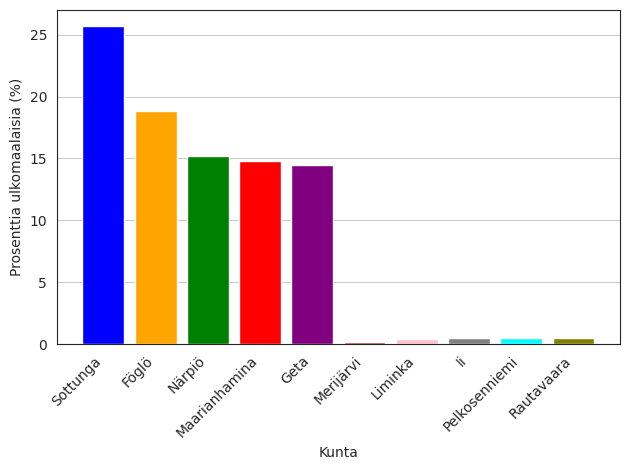

In [45]:
# Pylväskaavio ulkomaalaisjakaumalle
plt.bar(total_f["Kunta"], total_f["%"], color=["blue", "orange", "green",
                                               "red", "purple", "brown",
                                               "pink", "gray", "cyan",
                                               "olive"])
plt.xlabel("Kunta")
plt.ylabel("Prosenttia ulkomaalaisia (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis = "y")

Vilkaistaan kuntien työllisyysastetta:

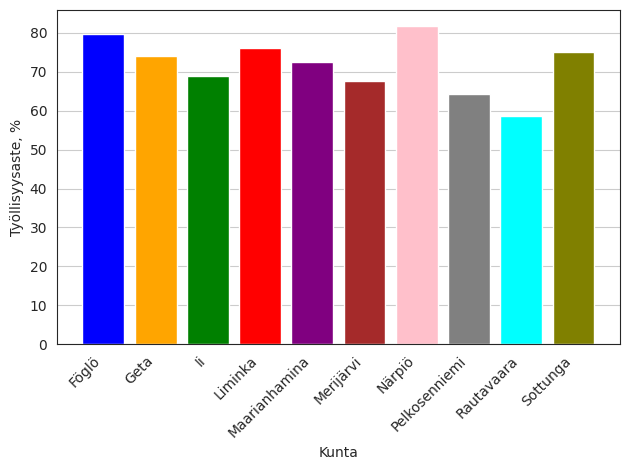

In [46]:
towns = ["Sottunga", "Föglö", "Närpiö",
         "Maarianhamina", "Geta", "Merijärvi",
         "Liminka", "Ii", "Pelkosenniemi", "Rautavaara"]

employment = towns_df[towns_df["Kunta"].isin(towns)][["Kunta", "Työllisyysaste, %, 2020"]]

# Pylväskaavio
plt.bar(employment["Kunta"], employment["Työllisyysaste, %, 2020"],
        color=["blue", "orange", "green",
               "red", "purple", "brown",
               "pink", "gray", "cyan", "olive"])

plt.xlabel("Kunta")
plt.ylabel("Työllisyysaste, %")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis = "y")

In [47]:
# Ruotsinkielisten osuuden mukaan, korkea
swe_hi = towns_df.nlargest(
    5, "Ruotsinkielisten osuus väestöstä, %, 2021")[
    ["Kunta", "Ruotsinkielisten osuus väestöstä, %, 2021"]]

# Matala
swe_low = towns_df.nsmallest(
    5, "Ruotsinkielisten osuus väestöstä, %, 2021")[
    ["Kunta", "Ruotsinkielisten osuus väestöstä, %, 2021"]]

# Yhdistetään aineistot
total_swe = pd.concat([swe_hi, swe_low])
total_swe = total_swe.rename(
    columns = {"Ruotsinkielisten osuus väestöstä, %, 2021": "%"})

total_swe

,Kunta,%
256,Sottunga,92.4
147,Luoto,92.0
132,Lemland,91.3
236,Saltvik,90.9
15,Finström,89.9
20,Haapavesi,0.0
21,Hailuoto,0.0
43,Iisalmi,0.0
77,Karstula,0.0
78,Karvia,0.0


In [48]:
# Viiden suurimman kunnan tunnusluvut sarakkeista 1-8
towns_df.nlargest(5, "Väkiluku, 2021").describe().iloc[:, :8]

,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021"
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,98.840000,329713.800000,0.980000,15.960000,67.140000,16.940000,3.060000,9.240000
std,1.295376,186462.531415,0.506952,2.183575,0.856154,1.625731,2.958547,4.777342
min,96.700000,209551.000000,0.200000,13.100000,66.100000,15.200000,0.200000,3.400000
25%,98.600000,239206.000000,0.800000,14.300000,66.400000,15.700000,0.500000,5.200000
50%,99.300000,244223.000000,1.100000,16.900000,67.400000,16.900000,2.300000,10.300000
75%,99.700000,297132.000000,1.300000,17.100000,67.700000,17.600000,5.600000,13.000000
max,99.900000,658457.000000,1.500000,18.400000,68.100000,19.300000,6.700000,14.300000


### Korrelaatioita
Tutkitaan seuraavaksi eri muuttujien välisiä korrelaatioita.

In [49]:
# Kertaus aineiston muodosta
towns_df.head()

,Kunta,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
0,Akaa,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,...,4432,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7
1,Alajärvi,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,...,3302,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8
2,Alavieska,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,...,704,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8
3,Alavus,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,...,4056,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0
4,Asikkala,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,...,2282,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3


In [50]:
# Korrelaatiokertoimet ulkomaan kansalaisten ja osatekijöiden välillä
towns_df.corr(numeric_only = True)\
              ["Ulkomaan kansalaisten osuus väestöstä, %, 2021"].sort_values()

Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020       -0.445119
Taloudellinen huoltosuhde, 2020                                                          -0.441716
Työttömien osuus työvoimasta, %, 2020                                                    -0.318100
Eläkeläisten osuus väestöstä, %, 2020                                                    -0.283562
Rivi- ja pientaloissa asuvien asuntokuntien osuus, %, 2021                               -0.241153
Konsernin lainakanta, euroa/asukas, 2020                                                 -0.206034
Yli 64-vuotiaiden osuus väestöstä, %, 2021                                               -0.199146
Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021                                     -0.136453
Jalostuksen työpaikkojen osuus, %, 2020                                                  -0.121664
Lainakanta, euroa/asukas, 2020                                                           -0.112208
Vuosikate,

Voimakkain positiivinen korrelaatio löytyy ruotsinkielisten (kenties kaksoiskansalaisuus vaikuttaa?) kanssa, kun taas voimakkaimmat negatiiviset korrelaatiot löytyvät sosiaali- ja terveystoiminnasta ja taloudellisesta huoltosuhteesta. Laaditaan molemmista voimakkaimmista kaaviot.

Text(0, 0.5, 'Ulkomaisten osuus, %')

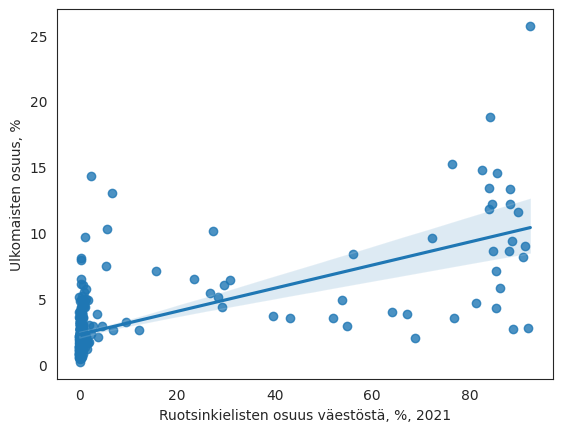

In [51]:
# Voimakkain positiivinen korrelaatio
sns.regplot(data = towns_df,
            x = "Ruotsinkielisten osuus väestöstä, %, 2021",
            y = "Ulkomaan kansalaisten osuus väestöstä, %, 2021")

plt.ylabel("Ulkomaisten osuus, %")

Text(0, 0.5, 'Ulkomaisten osuus, %')

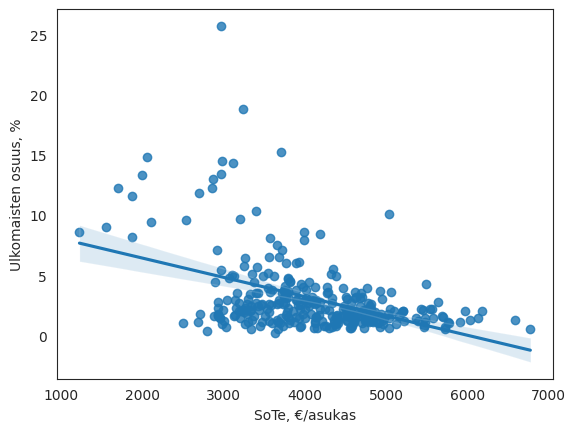

In [52]:
# Voimakkain negatiivinen korrelaatio
sns.regplot(data = towns_df,
            x = "Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020",
            y = "Ulkomaan kansalaisten osuus väestöstä, %, 2021")

plt.xlabel("SoTe, €/asukas")
plt.ylabel("Ulkomaisten osuus, %")

Tarkastellaan myös muita korrelaatioita, jotka vastaavat esitettyihin kysymyksiin.

In [53]:
# Korrelaatiokertoimet korkeakoulun suorittaneiden ja osatekijöiden välillä
towns_df.corr(numeric_only = True)\
["Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020"].sort_values()

Taloudellinen huoltosuhde, 2020                                                          -0.655128
Eläkeläisten osuus väestöstä, %, 2020                                                    -0.649821
Yli 64-vuotiaiden osuus väestöstä, %, 2021                                               -0.629464
Alkutuotannon työpaikkojen osuus, %, 2020                                                -0.604371
Rivi- ja pientaloissa asuvien asuntokuntien osuus, %, 2021                               -0.579853
Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020       -0.570357
Asuinkunnassaan työssäkäyvien osuus, %, 2020                                             -0.315633
Työttömien osuus työvoimasta, %, 2020                                                    -0.269635
Työpaikkaomavaraisuus, 2020                                                              -0.133943
Vuosikate, euroa/asukas, 2020                                                            -0.044002
Jalostukse

Text(0, 0.5, 'Korkeakoulun suorittaneet\n>15-vuotiaat, %')

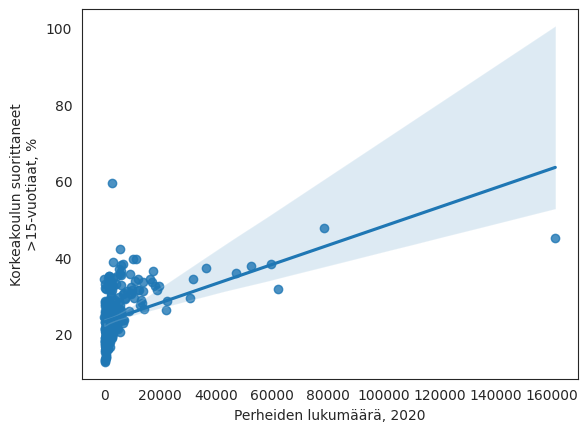

In [54]:
# Kaavio korkeakoulun ja perheiden välillä
sns.regplot(data = towns_df,
            x = "Perheiden lukumäärä, 2020",
            y = "Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020")

plt.ylabel("Korkeakoulun suorittaneet\n>15-vuotiaat, %")

Korrelaatio on selvästi olemassa näiden kahden muuttujan välillä.

Text(0, 0.5, 'Korkeakoulun suorittaneet\n>15-vuotiaat, %')

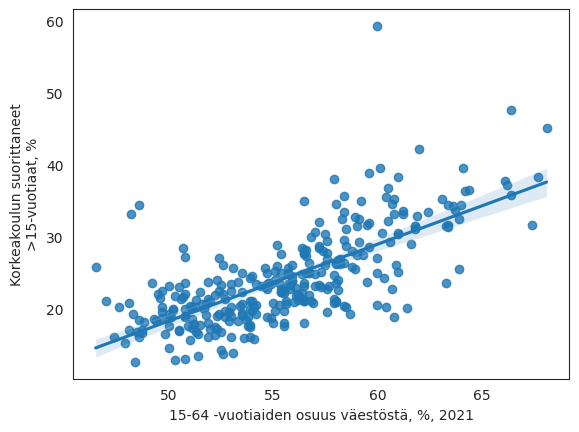

In [55]:
# Korkeakoulu ja 15-64 -vuotiaiden osuus väestöstä
sns.regplot(data = towns_df,
            x = "15-64 -vuotiaiden osuus väestöstä, %, 2021",
            y = "Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020")

plt.ylabel("Korkeakoulun suorittaneet\n>15-vuotiaat, %")

Kaaviosta näkee selkeän yhteyden korkeakoulutuksen ja 15-64 -vuotiaiden prosenttien välillä.

Katsotaan vielä ruotsinkielisten korrelaatiokertoimet:

In [56]:
towns_df.corr(numeric_only = True)\
["Ruotsinkielisten osuus väestöstä, %, 2021"].sort_values()

Työttömien osuus työvoimasta, %, 2020                                                    -0.449588
Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020       -0.442825
Taloudellinen huoltosuhde, 2020                                                          -0.414823
Konsernin lainakanta, euroa/asukas, 2020                                                 -0.298829
Eläkeläisten osuus väestöstä, %, 2020                                                    -0.247233
Taajama-aste, %, 2020                                                                    -0.234723
Vuokra-asunnoissa asuvien asuntokuntien osuus, %, 2020                                   -0.183689
Asuinkunnassaan työssäkäyvien osuus, %, 2020                                             -0.172116
Työpaikkaomavaraisuus, 2020                                                              -0.163677
Yli 64-vuotiaiden osuus väestöstä, %, 2021                                               -0.150371
Vuosikate,

Kertoimet osoittavat, että ruotsinkielisyydellä ei ole huomattavan voimakkaita (> 0,7 tai < -0,7) korrelaatioita, ja vain muutamien muuttujien kanssa keskinkertainen (eng. moderate) yhteys.

### P-arvot
Lähdetään selvittämään joidenkin korrelointien tilastollista merkitsevyyttä.

In [57]:
# Luodaan aineistosta kopio ja poistetaan kunta-sarake
towns_df_p = towns_df.copy()
towns_df_p = towns_df_p.drop(["Kunta"], axis = 1)

# Alustetaan apumuuttujia
p_list = []
swe = "Ruotsinkielisten osuus väestöstä, %, 2021"

for i in towns_df_p:
  r, p = pearsonr(towns_df_p[swe], towns_df_p[i])
  if p != 0 and p < 0.05:
    p_list.append(p)
  print(f"{i:<100} r = {r:>6.3f}, p = {p}")

print(f"\nTilastollisesti merkitsevästi ruotsinkielisyyden kanssa korreloivia \
muuttujia on {len(p_list)}, vertailukohtia {towns_df_p.shape[1] - 1}")

Taajama-aste, %, 2020                                                                                r = -0.235, p = 3.076794649412949e-05
Väkiluku, 2021                                                                                       r = -0.063, p = 0.27266239227195527
Väkiluvun muutos edellisestä vuodesta, %, 2021                                                       r =  0.252, p = 7.4200737546981065e-06
Alle 15-vuotiaiden osuus väestöstä, %, 2021                                                          r =  0.121, p = 0.03377067855864722
15-64 -vuotiaiden osuus väestöstä, %, 2021                                                           r =  0.136, p = 0.017142863386986746
Yli 64-vuotiaiden osuus väestöstä, %, 2021                                                           r = -0.150, p = 0.008105572999907218
Ruotsinkielisten osuus väestöstä, %, 2021                                                            r =  1.000, p = 0.0
Ulkomaan kansalaisten osuus väestöstä, %, 2021    

In [58]:
# Tutkitaan työllisyysaste
p_list = []
emp = "Työllisyysaste, %, 2020"

for i in towns_df_p:
  r, p = pearsonr(towns_df_p[emp], towns_df_p[i])
  if p != 0 and p < 0.05:
    p_list.append(p)
  print(f"{i:<100} r = {r:>6.3f}, p = {p}")

print(f"\nTilastollisesti merkitsevästi työllisyysasteen kanssa korreloivia \
muuttujia on {len(p_list)}, vertailukohtia {towns_df_p.shape[1] - 1}")

Taajama-aste, %, 2020                                                                                r =  0.028, p = 0.6291388597626559
Väkiluku, 2021                                                                                       r = -0.083, p = 0.1440638701787368
Väkiluvun muutos edellisestä vuodesta, %, 2021                                                       r =  0.450, p = 8.298593219655947e-17
Alle 15-vuotiaiden osuus väestöstä, %, 2021                                                          r =  0.557, p = 1.3126718786558087e-26
15-64 -vuotiaiden osuus väestöstä, %, 2021                                                           r =  0.410, p = 5.651130599893487e-14
Yli 64-vuotiaiden osuus väestöstä, %, 2021                                                           r = -0.560, p = 6.1755994912009284e-27
Ruotsinkielisten osuus väestöstä, %, 2021                                                            r =  0.472, p = 1.5205591372280196e-18
Ulkomaan kansalaisten osuus vä

Aineiston muuttujien välillä on havaittavissa merkittäviä korrelaatioita ja p-arvot osoittavat myös, että ne ovat tilastollisesti merkitseviä.